In [1]:
import cvxpy as cvx
import numpy as np
import scipy.linalg as sla
import mosek
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)

In [3]:
# When W must be nonnegative and graph is connected
W = cvx.Variable((4,4));
oneFour = np.ones(4);
# negVal = -0.48;
constraints = [ W[1,2] == 0, W[2,1] == 0, W[3,0] == 0];#W[1,1] == 0, W[2,2] == 0, W
for i in range(4):
    for j in range(4):
        if i == 3 and j == 1:
            constraints.append(W[i,j] <= 0.1);
        else:    
            constraints.append(W[i,j] >= 0);
constraints.append(oneFour.T*(W) == oneFour.T);
constraints.append(W*(oneFour) == oneFour);
# constraints.append(W[3,1] <= 0);
# constraints.append(W[1,2] == 0.75*1.5/0.25/0.5*W[2,1])
# constraints.append(W[1,0]*(negVal) + 0.95*W[2,0] == 0)
prob = cvx.Problem(cvx.Minimize(cvx.norm(W - oneFour.dot(oneFour.T)/4., 2)), constraints)
prob.solve(solver = 'MOSEK');
print ( W.value)
eigVal, eigVec = np.linalg.eig(W.value);
print ((eigVal));
print ((eigVec));

[[ 0.2186  0.4909  0.1511  0.1394]
 [ 0.2429  0.606  -0.      0.1511]
 [ 0.5385 -0.      0.2429  0.2186]
 [-0.     -0.0969  0.606   0.4909]]
[-0.184   1.      0.2256  0.5168]
[[ 0.3138 -0.5     0.332  -0.3529]
 [-0.2115 -0.5     0.1252 -0.4383]
 [-0.7037 -0.5     0.3917 -0.0347]
 [ 0.6014 -0.5    -0.8489  0.8259]]


In [4]:
# when W must be disconnected, but still non-negative
W = cvx.Variable((4,4));
oneFour = np.ones(4);
constraints = [W[1,2] == 0, W[2,1] == 0, W[1,0] == 0, W[0,1] == 0, W[0,2] == 0, W[0,3] == 0, W[2,0] == 0, W[3,0] == 0];
for i in range(4):
    for j in range(4):
        if i == 3 and j == 1:
            constraints.append(W[i,j] <= 0.1);
        else:    
            constraints.append(W[i,j] >= 0);
constraints.append(oneFour.T*(W) == oneFour.T);
constraints.append(W*(oneFour) == oneFour);
# constraints.append(W[3,1] <= 0);
# constraints.append(W[1,2] == 0.75*1.5/0.25/0.5*W[2,1])
# constraints.append(W[1,0]*(negVal) + 0.95*W[2,0] == 0)
prob = cvx.Problem(cvx.Minimize(cvx.norm(W - oneFour.dot(oneFour.T)/4., 2)), constraints)
prob.solve(solver = 'MOSEK');
M = W.value;
print (M)
eigVal, eigVec = np.linalg.eig(M);
print ((eigVal));
print ((eigVec));

[[ 1.     -0.     -0.     -0.    ]
 [-0.      0.9457 -0.      0.0543]
 [-0.     -0.      0.5343  0.4657]
 [-0.      0.0543  0.4657  0.48  ]]
[0.0389 1.     0.9211 1.    ]
[[ 0.      0.      0.      1.    ]
 [-0.0436 -0.5774 -0.8153  0.    ]
 [-0.6843 -0.5774  0.4454  0.    ]
 [ 0.7279 -0.5774  0.3699  0.    ]]


In [45]:
# when W can be negative, graph is fully connected
W = cvx.Variable((4,4));
oneFour = np.ones(4);
# negVal = -0.48;
constraints = [ W[1,2] == 0, W[2,1] == 0, W[3,0] == 0];#W[1,1] == 0, W[2,2] == 0, W
constraints.append(oneFour.T*(W) == oneFour.T);
constraints.append(W*(oneFour) == oneFour);
constraints.append(W[3,1] <= -0.1);
# constraints.append(W[1,2] == 0.75*1.5/0.25/0.5*W[2,1])
# constraints.append(W[1,0]*(negVal) + 0.95*W[2,0] == 0)
prob = cvx.Problem(cvx.Minimize(cvx.norm(W - oneFour.dot(oneFour.T)/4., 2)), constraints)
prob.solve(solver = 'MOSEK');
print ( W.value)
eigVal, eigVec = np.linalg.eig(W.value);
print ((eigVal));
print ((eigVec));

[[ 0.0927  0.9808 -0.1311  0.0576]
 [ 0.2453  0.8858 -0.     -0.1311]
 [ 0.662  -0.      0.2453  0.0927]
 [-0.     -0.8666  0.8858  0.9808]]
[-0.0522+0.3199j -0.0522-0.3199j  1.    +0.j      1.309 +0.j    ]
[[ 0.2445-0.3716j  0.2445+0.3716j -0.5   +0.j     -0.2977+0.j    ]
 [-0.0366+0.1199j -0.0366-0.1199j -0.5   +0.j     -0.4336+0.j    ]
 [-0.6961+0.j     -0.6961-0.j     -0.5   +0.j     -0.1118+0.j    ]
 [ 0.4882+0.2518j  0.4882-0.2518j -0.5   +0.j      0.8431+0.j    ]]


In [44]:
# when W can be negative, graph is not connected
W = cvx.Variable((4,4));
oneFour = np.ones(4);
constraints = [W[1,2] == 0, W[2,1] == 0, W[1,0] == 0, W[0,1] == 0, W[0,2] == 0, W[0,3] == 0, W[2,0] == 0, W[3,0] == 0];

constraints.append(oneFour.T*(W) == oneFour.T);
constraints.append(W*(oneFour) == oneFour);
constraints.append(W[3,1] <= -0.1);
# constraints.append(W[1,2] == 0.75*1.5/0.25/0.5*W[2,1])
# constraints.append(W[1,0]*(negVal) + 0.95*W[2,0] == 0)
prob = cvx.Problem(cvx.Minimize(cvx.norm(W - oneFour.dot(oneFour.T)/4., 2)), constraints)
prob.solve(solver = 'MOSEK');
M = W.value;
print (M)
eigVal, eigVec = np.linalg.eig(M);
print ((eigVal));
print ((eigVec));

[[ 1.     -0.     -0.     -0.    ]
 [-0.      1.6147 -0.     -0.6147]
 [-0.     -0.      0.2351  0.7649]
 [-0.     -0.6147  0.7649  0.8498]]
[-0.3474  1.      2.047   1.    ]
[[ 0.      0.      0.      1.    ]
 [ 0.1865  0.5774  0.7949  0.    ]
 [-0.7817  0.5774 -0.236   0.    ]
 [ 0.5952  0.5774 -0.5589  0.    ]]


<IPython.core.display.Javascript object>


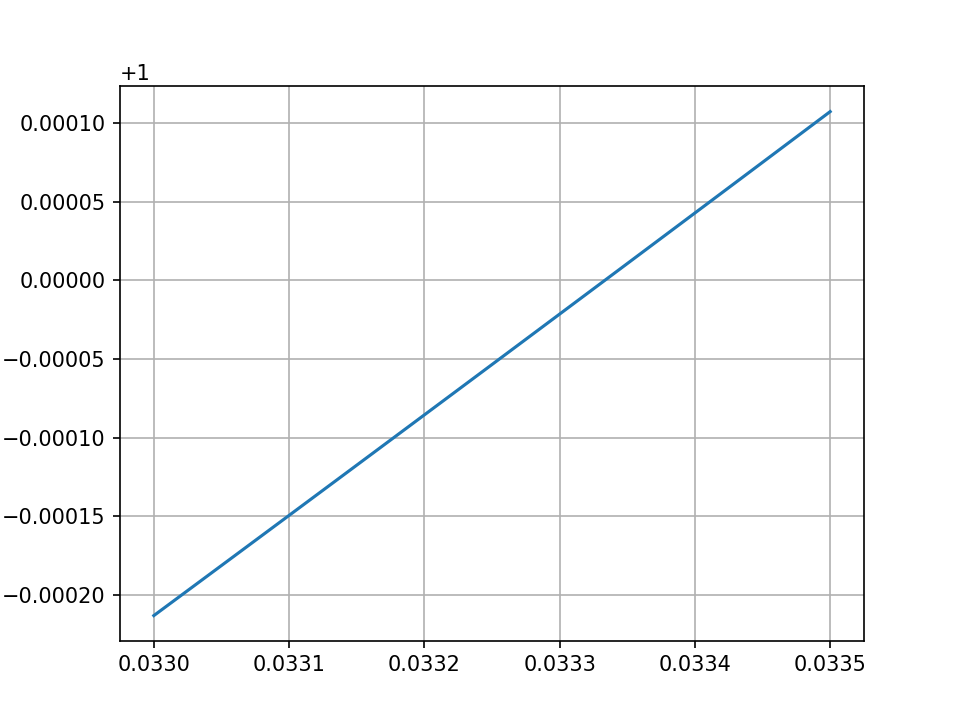

In [82]:
%matplotlib notebook
Samples = 100;
negArr = np.linspace(0.033, 0.0335, Samples);
eigVals = np.zeros((4, Samples));
for ind in range(Samples):
    L = np.array([[0.2, -0.1, -0.1, 0],
                   [-0.1, 0.2, 0, -0.1],
                   [-0.1, 0, 0.2, negArr[ind]],#(0.1-negArr[ind])
                   [0, -0.1, negArr[ind], (0.1-negArr[ind])]]);

    W = np.eye(4) - L;
#     print (L)
    lambL, vecL = np.linalg.eig(L);
#     print (lambL)

    lambW, vecW = np.linalg.eig(W);
    eigVals[:, ind] = lambW;
#     print (lambW)

plt.figure(); 
plt.plot(negArr, abs(eigVals[0]));
plt.grid()
plt.show()

In [85]:
negVal = 0.033333
L = np.array([[0.2, -0.1, -0.1, 0],
               [-0.1, 0.2, 0, -0.1],
               [-0.1, 0, 0.2, negVal],#(0.1-negArr[ind])
               [0, -0.1, negVal, 0.1-negVal]]);

W = np.eye(4) - L;
print (W)
lambL, vecL = np.linalg.eig(L);
print (lambL)

lambW, vecW = np.linalg.eig(W);
print (abs(lambW))
print (vecW)


[[ 0.8     0.1     0.1     0.    ]
 [ 0.1     0.8     0.      0.1   ]
 [ 0.1     0.      0.8    -0.0333]
 [ 0.      0.1    -0.0333  0.9333]]
[2.1428e-07 7.2518e-02 3.4658e-01 2.4757e-01]
[1.     0.9275 0.6534 0.7524]
[[ 2.6726e-01  6.5915e-01  6.8287e-01 -1.6667e-01]
 [ 5.3452e-01  2.2634e-01 -5.6968e-01 -5.8182e-01]
 [ 2.5772e-06  6.1396e-01 -4.3127e-01  6.6111e-01]
 [ 8.0178e-01 -3.7061e-01  1.5216e-01  4.4344e-01]]


<IPython.core.display.Javascript object>


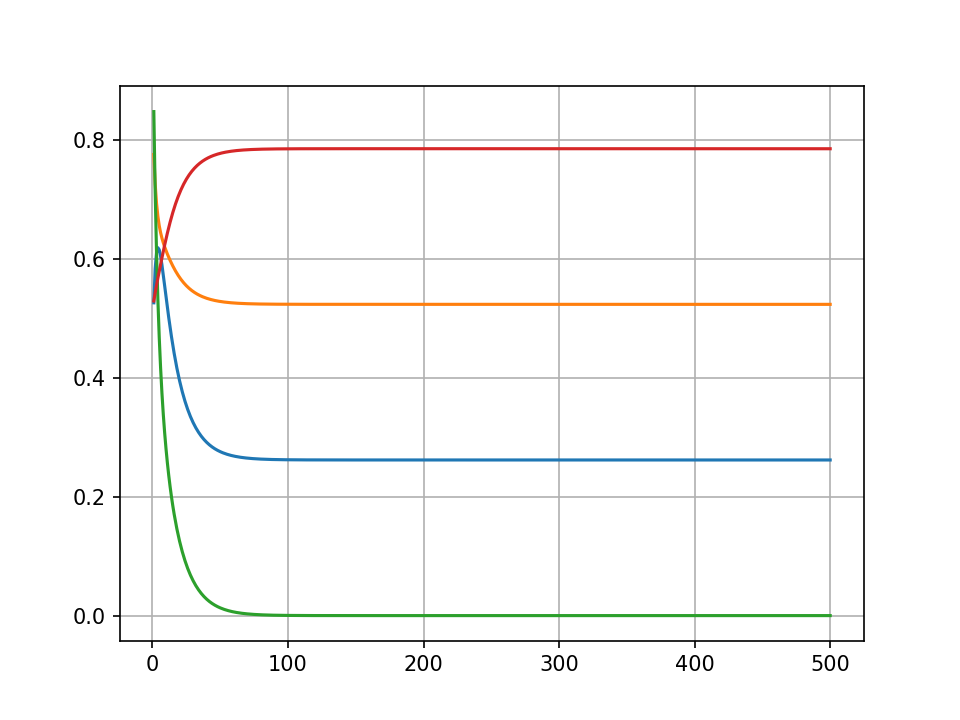

In [88]:
x0 = np.random.rand(4);
T = 500;
xt = np.zeros((4,T))
for t in range(T):
    if t == 0:
        xt[:,t] = x0;
    else:
        xt[:,t] = W.dot(xt[:,t-1]);
#         xt[0,t] += np.random.rand()
plt.figure();
plt.plot(np.linspace(1,T, T), xt.T);
plt.grid()

In [6]:
alpha = 0.1; beta = 0.1;
gamma = (alpha + beta)/2 + 0.5*np.sqrt(alpha*alpha + beta*beta + 6*alpha*beta);
sigma = -alpha*beta/gamma;
# sigma = -0.053
print (gamma); 
print (sigma)

W = np.array([[1 - (alpha + gamma), alpha, gamma, 0],
              [alpha, 1 - (alpha + beta), 0, beta],
              [gamma, 0, 1 - (gamma + sigma), sigma], 
              [0, beta, sigma, 1 - (beta + sigma)]]);
lambW, vecW = np.linalg.eig(W);
print (lambW)
print (vecW)
print ( alpha*beta + sigma*gamma)
print (W[0,2]*W[2,3] + W[0,1]*W[1,3])
print ( W[0,2]*W[2,2]*W[2,3] + W[0,1]*W[1,1]*W[1,3])
print (alpha + beta - gamma - sigma)

0.24142135623730954
-0.041421356237309505
[0.4586 1.     0.7414 1.    ]
[[-7.9410e-01  6.0778e-01 -3.3256e-16  1.3009e-01]
 [ 2.3259e-01  3.0389e-01 -8.1252e-01 -3.6449e-01]
 [ 5.6152e-01  7.3366e-01  3.3656e-01  3.3496e-01]
 [ 0.0000e+00  0.0000e+00  4.7596e-01 -8.5908e-01]]
0.0
0.0
1.734723475976807e-18
-2.0816681711721685e-17


In [175]:
L = np.array([[alpha + gamma, -alpha, -gamma, 0], 
              [-alpha, alpha + beta, 0, -beta],
              [-gamma, 0, gamma + sigma, -sigma],
              [0, -beta, -sigma, beta + sigma]]);
lambL, vecL = np.linalg.eig(L);
print (L)
print (abs(lambL))
print (vecL)
print ( 1/alpha + 1/beta + 1/gamma)
print (1/sigma)

[[ 0.3414 -0.1    -0.2414  0.    ]
 [-0.1     0.2     0.     -0.1   ]
 [-0.2414  0.      0.2     0.0414]
 [ 0.     -0.1     0.0414  0.0586]]
[5.4142e-01 5.5511e-17 2.5858e-01 2.7756e-17]
[[ 7.9410e-01 -6.0778e-01 -1.9073e-16 -1.0279e-01]
 [-2.3259e-01 -3.0389e-01  8.1252e-01  3.8200e-01]
 [-5.6152e-01 -7.3366e-01 -3.3656e-01 -3.0360e-01]
 [ 0.0000e+00  0.0000e+00 -4.7596e-01  8.6680e-01]]
24.14213562373095
-24.14213562373095


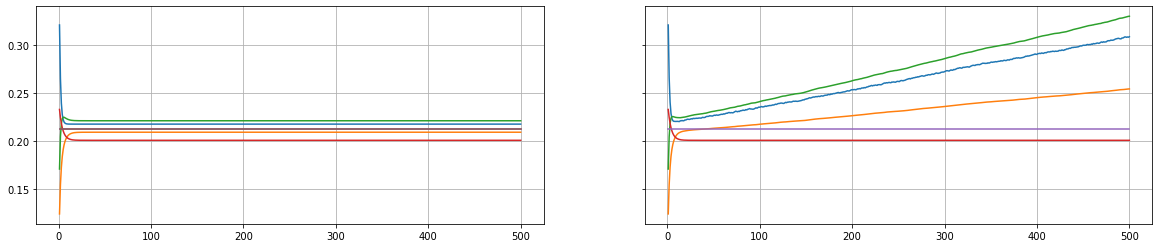

In [186]:
x0 = np.random.rand(4);
T = 500;
xt = np.zeros((4,T))
yt = np.zeros((4,T));
avg = np.ones(T)* np.sum(x0)/4;
timeAvg = np.zeros((T));
for t in range(T):
    if t == 0:
        xt[:,t] = x0;
        yt[:,t] = x0;
    else:
        xt[:,t] = W.dot(xt[:,t-1]);
        yt[:,t] = W.dot(yt[:,t-1]);
        yt[0,t] += 0.001*np.random.rand();
    timeAvg[t] = np.sum(xt[:,t])/4;

fig, axs = plt.subplots(ncols=2, sharey = True,figsize=(20,4))
axs[0].plot(np.linspace(1,T, T), xt.T);
axs[0].plot(np.linspace(1,T,T), avg);
axs[0].plot(np.linspace(1,T,T), timeAvg);
axs[1].plot(np.linspace(1,T,T), yt.T);
axs[1].plot(np.linspace(1,T,T), avg);
axs[0].grid(); axs[1].grid();
